# EXPLORATION 7 나랑 닮은 연예인은 누구?

# 후기

예시에서 `경로`만 고치면 결과물을 얻을 수는 있다.   
물론 PIL Image로 저장해서 다양하고 재미있는 시각화는 머나먼 이야기!   
결과만 보자면 나는 래퍼 인크레더블을 닮은 것으로..

[(418, 846, 804, 461)]


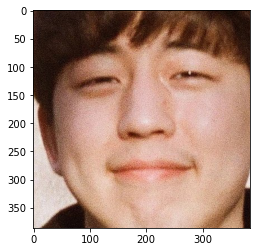

In [2]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/star_me/박성준.jpeg'
image = face_recognition.load_image_file(image_path) # 이미지를 불러와 얼굴을 찾아낸다.
face_locations = face_recognition.face_locations(image) # 찾아낸 얼굴을 좌표 벡터로 바꾼다.

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0] # 얼굴 위치를 각 변수에 전달
cropped_face = image[a:c,d:b,:] # 각 변수를 기반으로 얼굴을 잘라낸다.

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

# 얼굴이 납작해보인다면 올바르게 보신 겁니다.

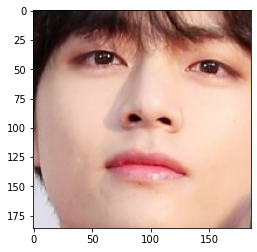

In [3]:
# 얼굴만 크롭하는 함수 만들기 - get_gropped_face


import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face


image_path = os.getenv('HOME')+'/aiffel/face_embedding/star_me/뷔.jpeg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face) 

# 닮았다는 게 아니라 얼마나 distance 차이를 갖는지 알아보기 위해 선정한 것입니다.
# 돌 던지지 마세욧!! 안닮았잖아욧!!

In [8]:
# 파일 내부에 어떤 파일이 있는지 출력 - 닮았다고 들었던 연예인은 이봉원..ㅜㅜ

import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/star_me'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['박해일.jpeg', '박철민.jpeg', '박시후.jpeg', '박보검.jpeg', '박은석.jpeg', '남주혁.jpeg', '딘딘.jpeg', '박혁권.jpeg', '박성훈.jpeg', '백성현.jpeg', '인크레더블.jpeg', '박노식.jpeg', '박상면.jpeg', '박건형.jpeg', '변우민.jpeg', '박건우.jpeg', '박신양.jpeg', '박상원.jpeg', '박성웅.jpeg', '박기웅.jpeg', '백일섭.jpeg', '박형준.jpeg', '박중훈.jpeg', '변희봉.jpeg', '박근형.jpeg', '박주형.jpeg', '박진우.jpeg', '백도빈.jpeg', '변요한.jpeg', '박영규.jpeg', '백윤식.jpeg', '성준박.jpeg', '박윤재.jpeg', '박성준.jpeg', '박해준.jpeg', '봉태규.jpeg', '원빈.jpeg', '박준규.jpeg', '박희순.jpeg', '뷔.jpeg', '배용준.jpeg', '유아인.jpeg', '박상민.jpeg']


In [9]:
# 얼굴을 128개의 벡터로 구합니당! - get_face_embedding(face) 인자는 크롭한 영역

image_file = os.path.join(dir_path, '원빈.jpeg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

# 원빈의 임베딩은 뭔가 숫자도 아름답다. 나의 임베딩과는 다르다.

[array([-0.14700919,  0.20210473,  0.07813126, -0.08157464, -0.11946138,
        -0.00476736, -0.09387659, -0.1456095 ,  0.12550382, -0.12387392,
         0.22673586, -0.05191388, -0.18438515, -0.0442444 , -0.04530894,
         0.17296398, -0.17092179, -0.18160468,  0.01482072,  0.00809618,
         0.13850407,  0.00919767,  0.03652154,  0.02007446, -0.13089654,
        -0.32949817, -0.14466222, -0.10994391, -0.0017243 , -0.06308407,
        -0.05065042, -0.0777135 , -0.19468471, -0.03213499,  0.00120792,
         0.05849838, -0.05119053, -0.06288328,  0.1751655 , -0.03782922,
        -0.25057459,  0.1286986 ,  0.03682479,  0.20527184,  0.17072898,
         0.08375411,  0.02976094, -0.16904607,  0.09463176, -0.12320507,
         0.1011088 ,  0.17346895,  0.08138513,  0.04767233,  0.01180654,
        -0.10650782,  0.0328702 ,  0.1031686 , -0.17297101,  0.05041356,
         0.1828742 , -0.049732  ,  0.00661564, -0.11579578,  0.21518117,
         0.11016504, -0.13791226, -0.19158921,  0.1

In [10]:
# 디렉토리 안에 있는 파일들을 파일마다 임베딩벡터를 구하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        # [[YOUR CODE]]
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)  # face를 따로 저장해두면 다양한 시각화할 때 재미있다.      
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0 :
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [24]:
# 확인해봅시다.

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/star_me'

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['박성준'] # 박성준 임베딩 결과를 출력한다

array([-4.49226722e-02,  4.92155217e-02,  2.58045010e-02, -1.22755710e-02,
       -1.08407818e-01, -7.28632659e-02, -8.30396488e-02, -1.48777410e-01,
        4.13323902e-02, -8.56868848e-02,  2.63754696e-01, -6.31280011e-03,
       -1.95736468e-01, -6.16497584e-02, -7.31412247e-02,  1.67828754e-01,
       -7.12796748e-02, -1.22164369e-01, -7.22015724e-02, -5.44682890e-03,
        9.01436210e-02,  7.83922970e-02,  1.76101942e-02,  5.93814552e-02,
       -1.61303893e-01, -2.39551425e-01, -8.74702930e-02, -1.00550443e-01,
       -6.05819821e-02, -1.37742236e-02, -6.14216104e-02, -1.23711247e-02,
       -1.67686358e-01, -2.33416799e-02,  8.33829641e-02,  4.96239625e-02,
        2.60453131e-02, -4.50114720e-02,  1.75595999e-01,  4.59081866e-02,
       -2.23358169e-01,  9.53040719e-02,  5.93377762e-02,  2.38987774e-01,
        2.04341307e-01,  4.47117072e-03,  6.95390403e-02, -1.80479735e-01,
        1.35964572e-01, -1.98132500e-01,  8.17124397e-02,  8.73379707e-02,
        1.43113121e-01,  

In [23]:
# 임베딩 벡터를 가지고 두 인물 간의 얼굴 거리를 계산해봅시다.
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2) # 유클리드 를 이용해 계산한다.

get_distance('박성준', '박상면').round(3) # 박성준과 다른 개체의 거리 차

# 박성준 - 원빈 : 0.569
# 박성준 - 유아인 : 0.557
# 박성준 - 남주혁 : 0.477
# 박성준 - 인크레더블 : 0.43
# 박성준 - 이봉원 : 0.609
# 박성준 - 뷔 : 0.555
# 박성준 - 딘딘 : 0.549

# 보셨습니까? 저는 이봉원을 닮지 않았습니다!!! 하지만 래퍼 인크레더블을 닮았군요.
# 인크레더블은 저의 다른 사진과 비슷한 거리를 갖고 있습니다.

0.595

In [26]:
# 특정 얼굴과 다른 것 비교하기!
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 특정 인물과 닮은 순서 메기기
def get_nearest_face(name, top=5):
    # [[YOUR CODE]]
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
# 박성준과 가장 닮은 사람은 누굴까요?
get_nearest_face('박성준',10) 

# 원빈은 안타깝게도 저와 닮지 못했군요. 탈락입니다. 순위 10에도 못 들어와요!! 이렇게 한심한 성적이라니!!
# 동일인물인데 0.41? 
# 보통 0.5 이하면 닮은 것으로 판단됩니다.

순위 1 : 이름(성준박), 거리(0.410957716561712)
순위 2 : 이름(인크레더블), 거리(0.43045058860701274)
순위 3 : 이름(남주혁), 거리(0.4769809032828116)
순위 4 : 이름(백성현), 거리(0.5000318123801804)
순위 5 : 이름(정해인), 거리(0.5003098023406501)
순위 6 : 이름(박희순), 거리(0.5070186612004395)
순위 7 : 이름(박상민), 거리(0.5294352441288638)
순위 8 : 이름(딘딘), 거리(0.5488139321806088)
순위 9 : 이름(박노식), 거리(0.5495112780809499)
순위 10 : 이름(박진우), 거리(0.5514079179026136)
